In [6]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

%matplotlib inline
%config InlineBackend.figure_format="retina"

In [7]:
# Load the tweets
with open("redfall_tweets.pkl", "rb") as f:
    tweets_hashtag = pickle.load(f)
f.close()

with open("redfall_tweets_search.pkl", "rb") as f:
    tweets_search = pickle.load(f)
f.close()

In [8]:
# Convert into dataframe for analysis
tweets_ht = pd.DataFrame(tweets_hashtag, columns=["date", "user", "language", "content"])
tweets_s = pd.DataFrame(tweets_search, columns=["date", "user", "language", "content"])

In [9]:
tweets_ht.head()

,date,user,language,content
0,2023-02-02 23:37:47+00:00,justcaterella,fr,T-minus 3 months until #redfall 🧛🏻‍♂️ 🧛🏻‍♀️ 🧛🏻...
1,2023-02-02 23:22:23+00:00,TheArkaneRealm,en,I’d keep my eyes on this one if I were all of ...
2,2023-02-02 23:05:39+00:00,skillANDpenache,en,Question!\n\nIs anyone actually bothered about...
3,2023-02-02 22:24:51+00:00,damarcodude,en,A BIG #Redfall video drops tomorrow ;) Be read...
4,2023-02-02 22:24:46+00:00,TeknoBlast,en,Come find out why Sony fans are outraged over ...


EDA on the datasets

In [10]:
tweets_ht.shape

(7678, 4)

In [11]:
tweets_s.shape

(11985, 4)

In [12]:
tweet_ht_lang = tweets_ht.groupby("language")["user"].count().sort_values(ascending=False).reset_index().rename(columns={"user": "freq"})
tweet_ht_lang["log_freq"] = np.log(tweet_ht_lang["freq"])
tweet_ht_lang[0:5]

,language,freq,log_freq
0,en,4147,8.330140
1,es,1167,7.062192
2,fr,496,6.206576
3,pt,415,6.028279
4,ja,364,5.897154


In [13]:
tweet_s_lang = tweets_s.groupby("language")["user"].count().sort_values(ascending=False).reset_index().rename(columns={"user": "freq"})
tweet_s_lang["log_freq"] = np.log(tweet_s_lang["freq"])
tweet_s_lang[0:5]

,language,freq,log_freq
0,en,8320,9.026418
1,es,1478,7.298445
2,pt,1010,6.917706
3,fr,338,5.823046
4,ja,241,5.484797


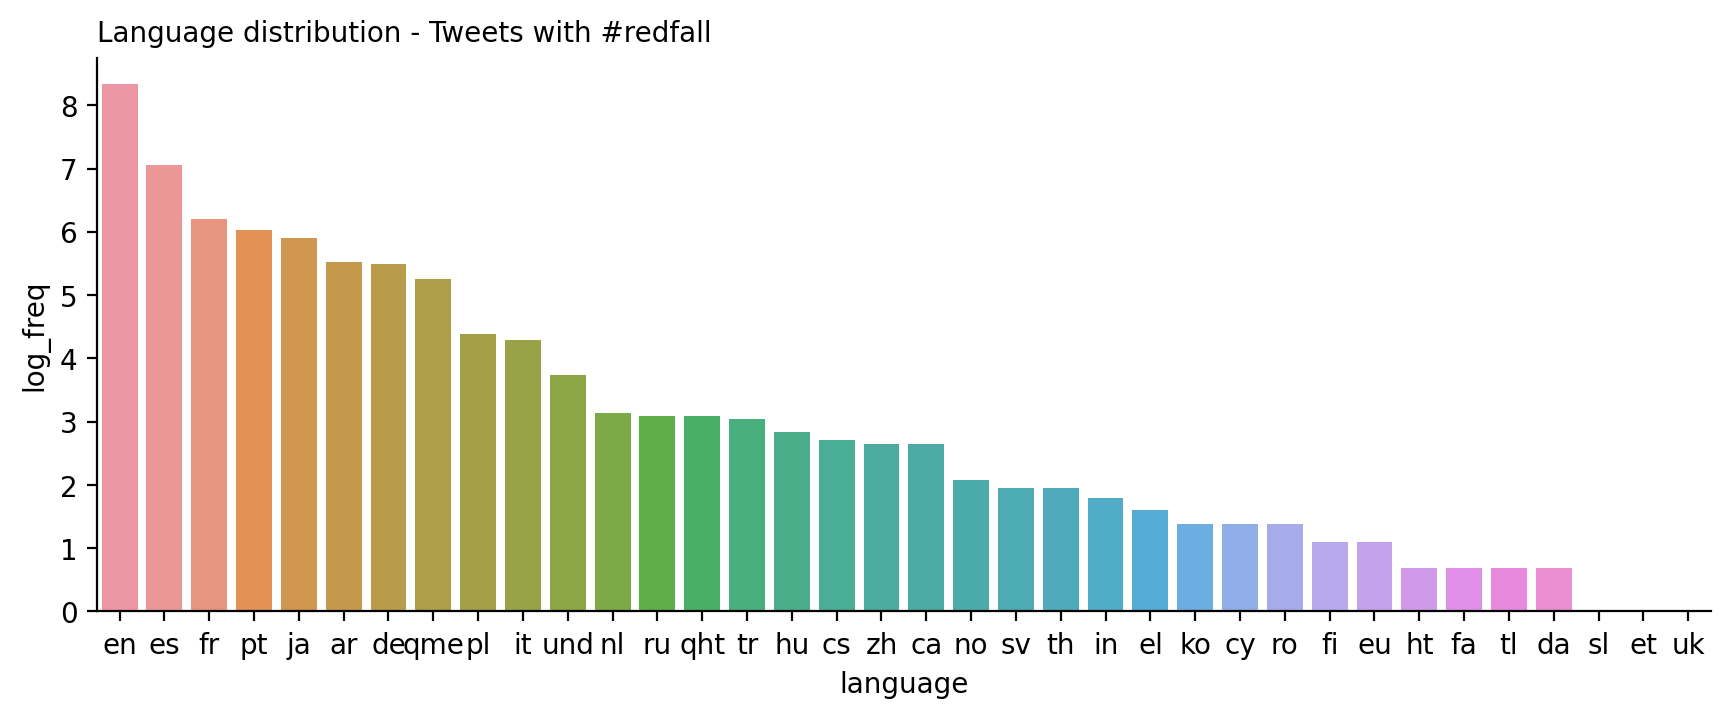

In [14]:
# Plot charts
sns.catplot(data=tweet_ht_lang, x="language", y="log_freq", kind="bar", aspect=2.5, height=3.5)
plt.title("Language distribution - Tweets with #redfall", fontsize=10, loc="left")
plt.show()

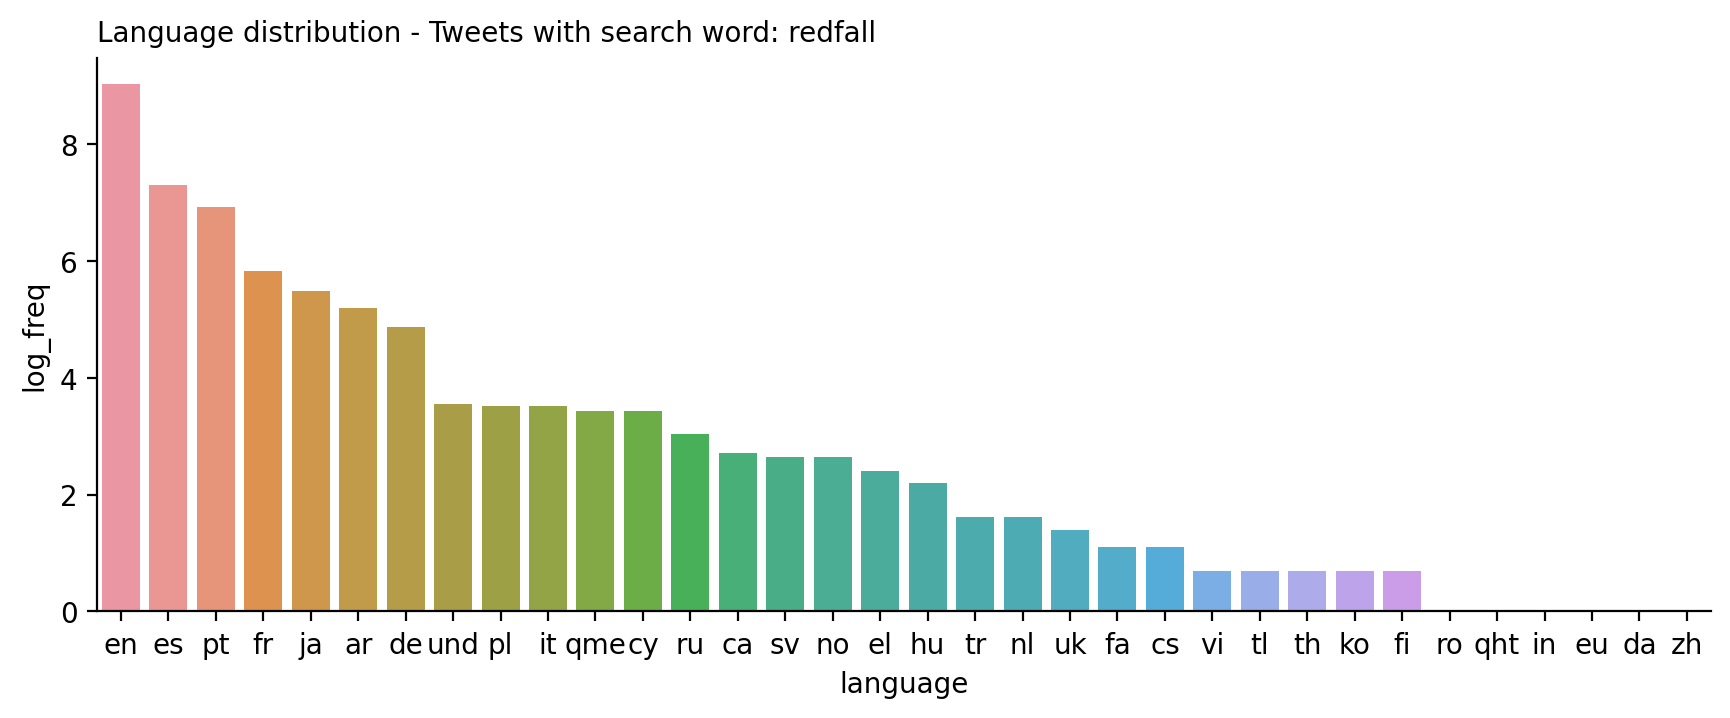

In [15]:
# Plot charts
sns.catplot(data=tweet_s_lang, x="language", y="log_freq", kind="bar", aspect=2.5, height=3.5)
plt.title("Language distribution - Tweets with search word: redfall", fontsize=10, loc="left")
plt.show()

In [16]:
# Check for any duplication between datasets
tweets = pd.concat([tweets_ht, tweets_s], axis=0)
tweets.sort_values(["date", "user", "content"], inplace=True)
tweets.shape

(19663, 4)

In [17]:
tweets.drop_duplicates().shape

(18363, 4)

In [18]:
tweets_ht.drop_duplicates().shape

(7678, 4)

In [19]:
tweets_s.drop_duplicates().shape

(11985, 4)

In [20]:
# What are the duplicated tweets?
tweets[tweets.duplicated()]

,date,user,language,content
78,2023-02-02 21:47:27+00:00,RedfallCount,en,Arkane Austin's #Redfall is coming exclusively...
75,2023-02-02 21:55:55+00:00,DeethaBug,en,@VGC_News Don’t worry #Redfall come out in may 👀
65,2023-02-02 22:09:15+00:00,Discord_HAKO,ja,#Redfall #レッドフォール\n2023年5月２日発売！\n#Fallout #DOO...
60,2023-02-02 22:15:06+00:00,KunamyMaster,en,"Ryzen 7000X3D Dates &amp; Prices, Gaming info,..."
49,2023-02-02 22:24:46+00:00,TeknoBlast,en,Come find out why Sony fans are outraged over ...
...,...,...,...,...
11960,2023-06-01 22:54:52+00:00,ShinkuTanaka,en,[DACH/TR] Early demon catches the arme wurscht...
11954,2023-06-01 22:57:47+00:00,TheEWZine,en,Sounds like Phil Spencer taking a hands-off ap...
11946,2023-06-01 23:01:25+00:00,TheEWZine,en,Really good look into #Redfall and also explan...
11939,2023-06-01 23:06:12+00:00,GEMMAMCCAB94987,en,Curious to see Redfall's impact on Xbox's succ...


In [21]:
tweet_lang = tweets.groupby("language")["user"].count().sort_values(ascending=False).reset_index().rename(columns={"user": "freq"})
tweet_lang["log_freq"] = np.log(tweet_lang["freq"])
tweet_lang[0:5]

,language,freq,log_freq
0,en,12467,9.430840
1,es,2645,7.880426
2,pt,1425,7.261927
3,fr,834,6.726233
4,ja,605,6.405228


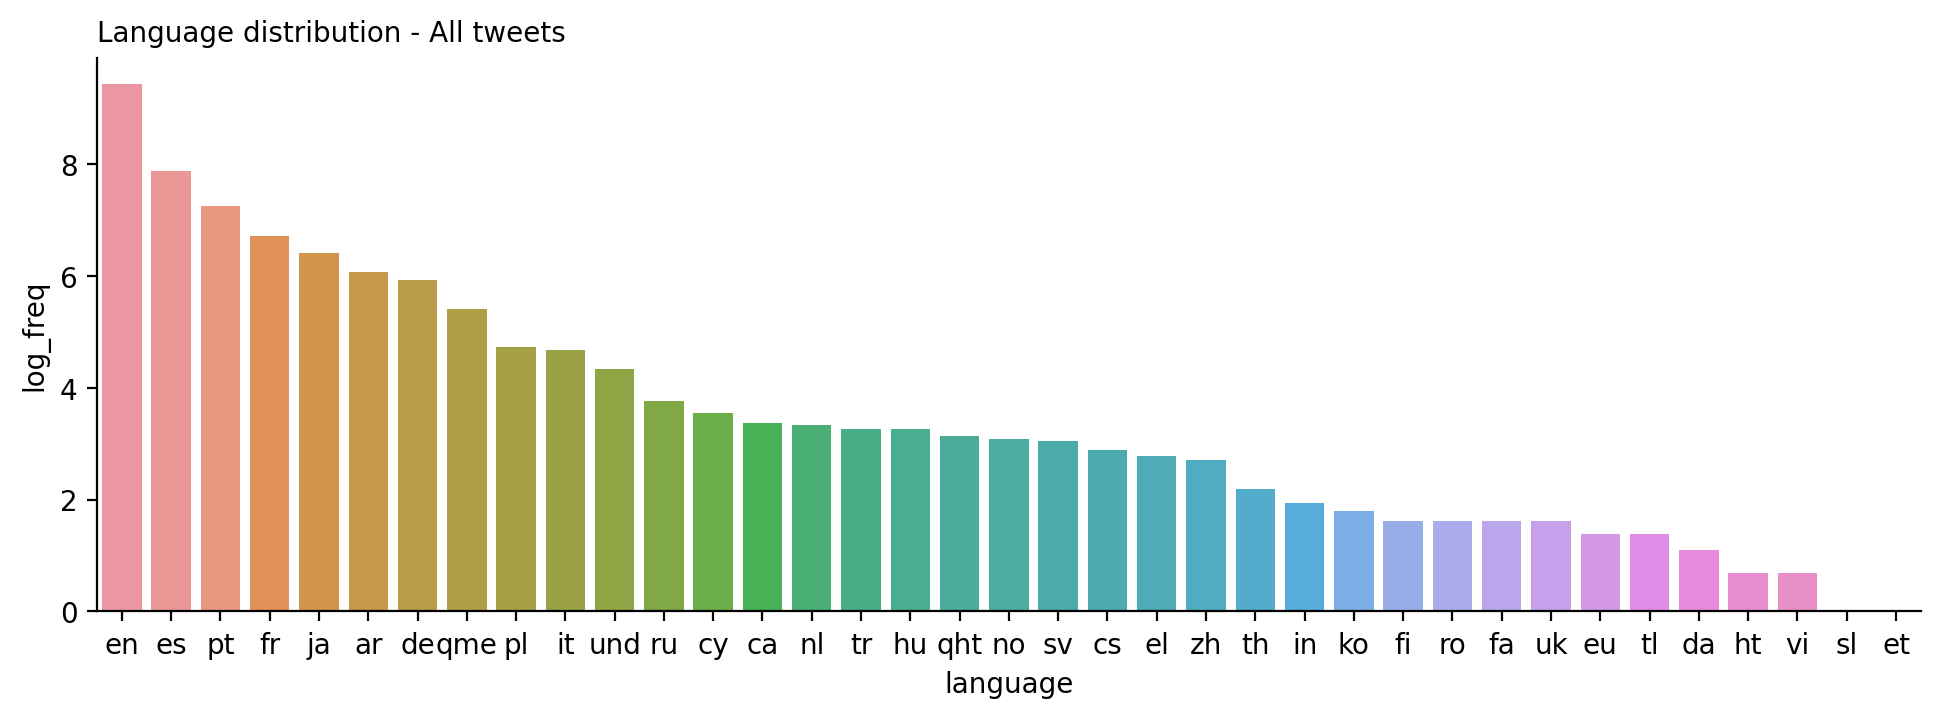

In [22]:
# Plot charts for combined dataset
sns.catplot(data=tweet_lang, x="language", y="log_freq", kind="bar", aspect=2.8, height=3.5)
plt.title("Language distribution - All tweets", fontsize=10, loc="left")
plt.show()

In [23]:
# Keep English tweets only
tweets = tweets[tweets["language"] == "en"]
tweets.shape

(12467, 4)

In [24]:
# Download as pickle
with open("tweets_english.pkl", "wb") as f:
    pickle.dump(tweets, f)
f.close()

In [34]:
# Plot volume of tweets over time (days)
tweets["date"] = tweets["date"].dt.date
tweets["date"] = pd.to_datetime(tweets["date"], errors="coerce")
tweets_day = tweets.groupby("date")["user"].count().reset_index().rename(columns={"user": "freq"})
tweets_day

,date,freq
0,2023-02-02,113
1,2023-02-03,94
2,2023-02-04,89
3,2023-02-05,66
4,2023-02-06,61
...,...,...
115,2023-05-28,90
116,2023-05-29,102
117,2023-05-30,92
118,2023-05-31,92


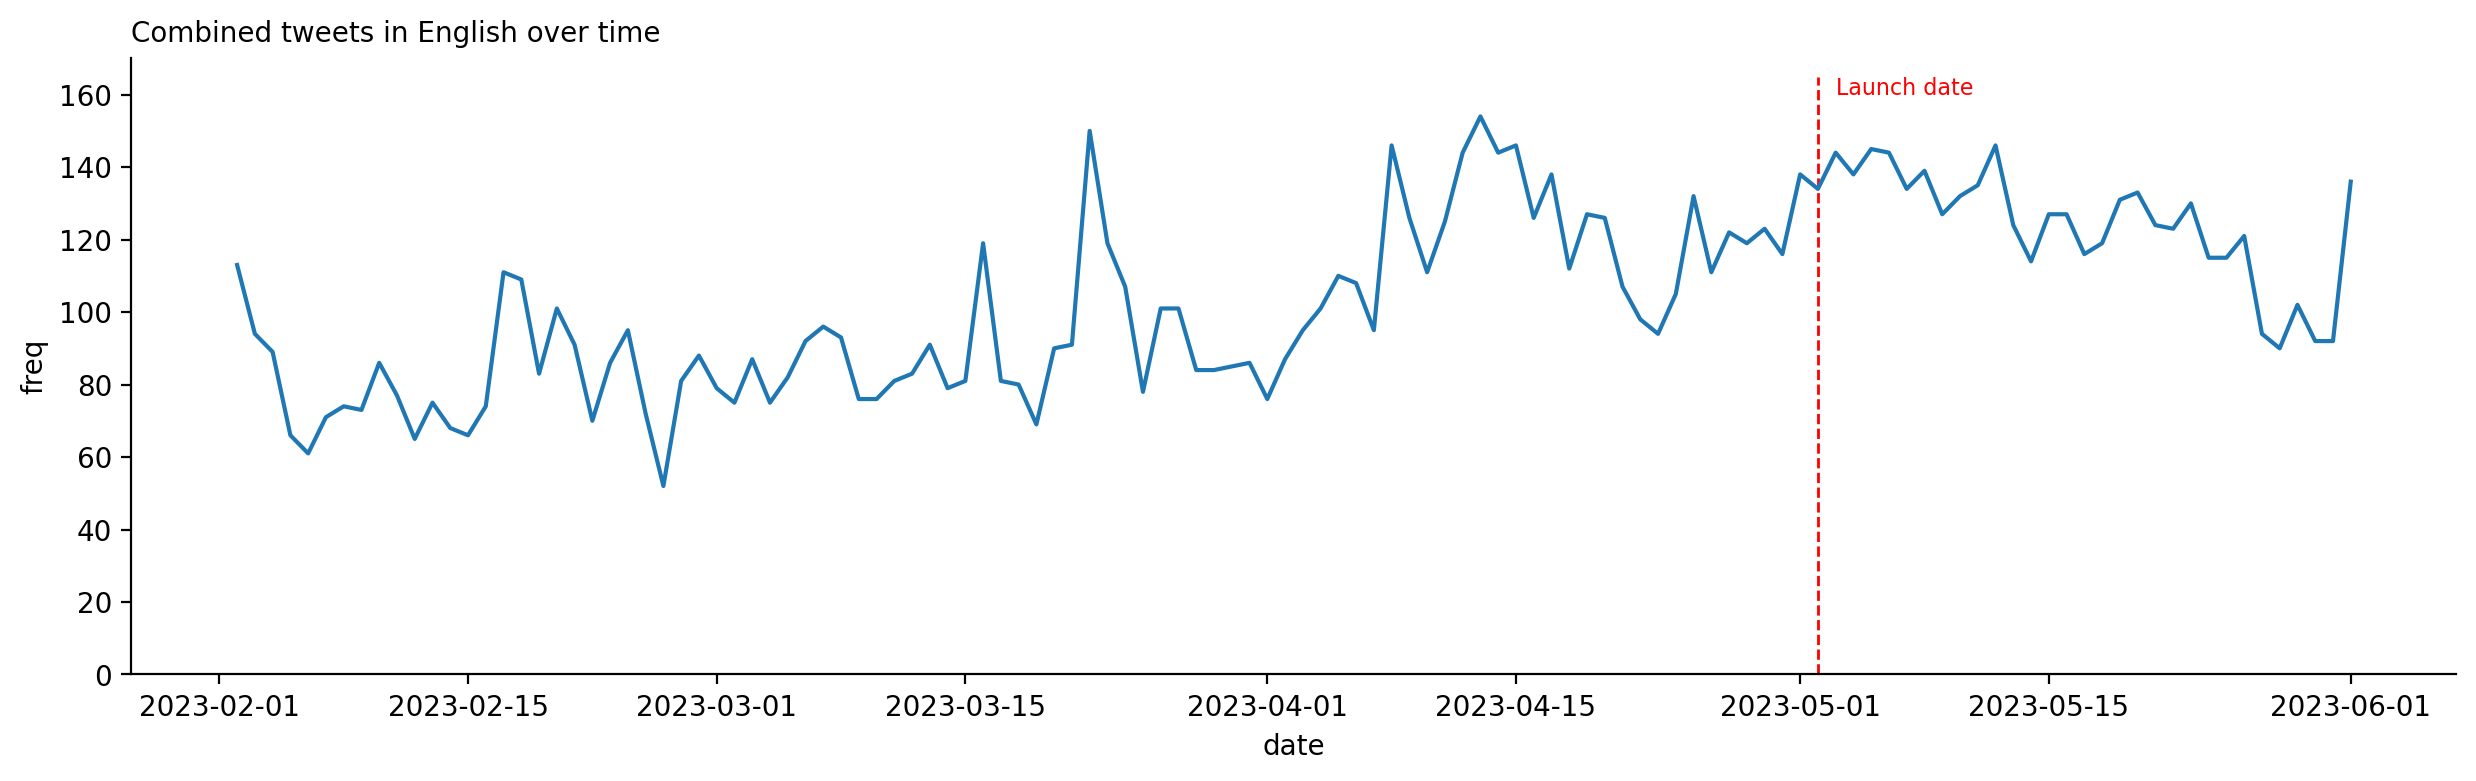

In [35]:
# Plot the chart
plt.figure(figsize=(15,4))
plt.title("Combined tweets in English over time", fontsize=10, loc="left")
plt.vlines(ymin=0, ymax=165, x=dt.datetime(2023,5,2), linewidth=1, linestyles="--", color="red")
plt.text(s="Launch date", x=dt.datetime(2023,5,3), y=160, fontsize=8, color="red")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.ylim(0, 170)
sns.lineplot(data=tweets_day, x="date", y="freq")
plt.show()

In [36]:
tweets.shape

(12467, 4)

In [39]:
# Get randomized sample to perform manual labelling
tweets.reset_index(drop=True, inplace=True)
tweets_samples = tweets.sample(1_000, replace=False, random_state=1)

tweets_samples.to_excel("tweets_samples.xlsx")
with open("tweets_samples.pkl", "wb") as f:
    pickle.dump(tweets_samples, f)
f.close()

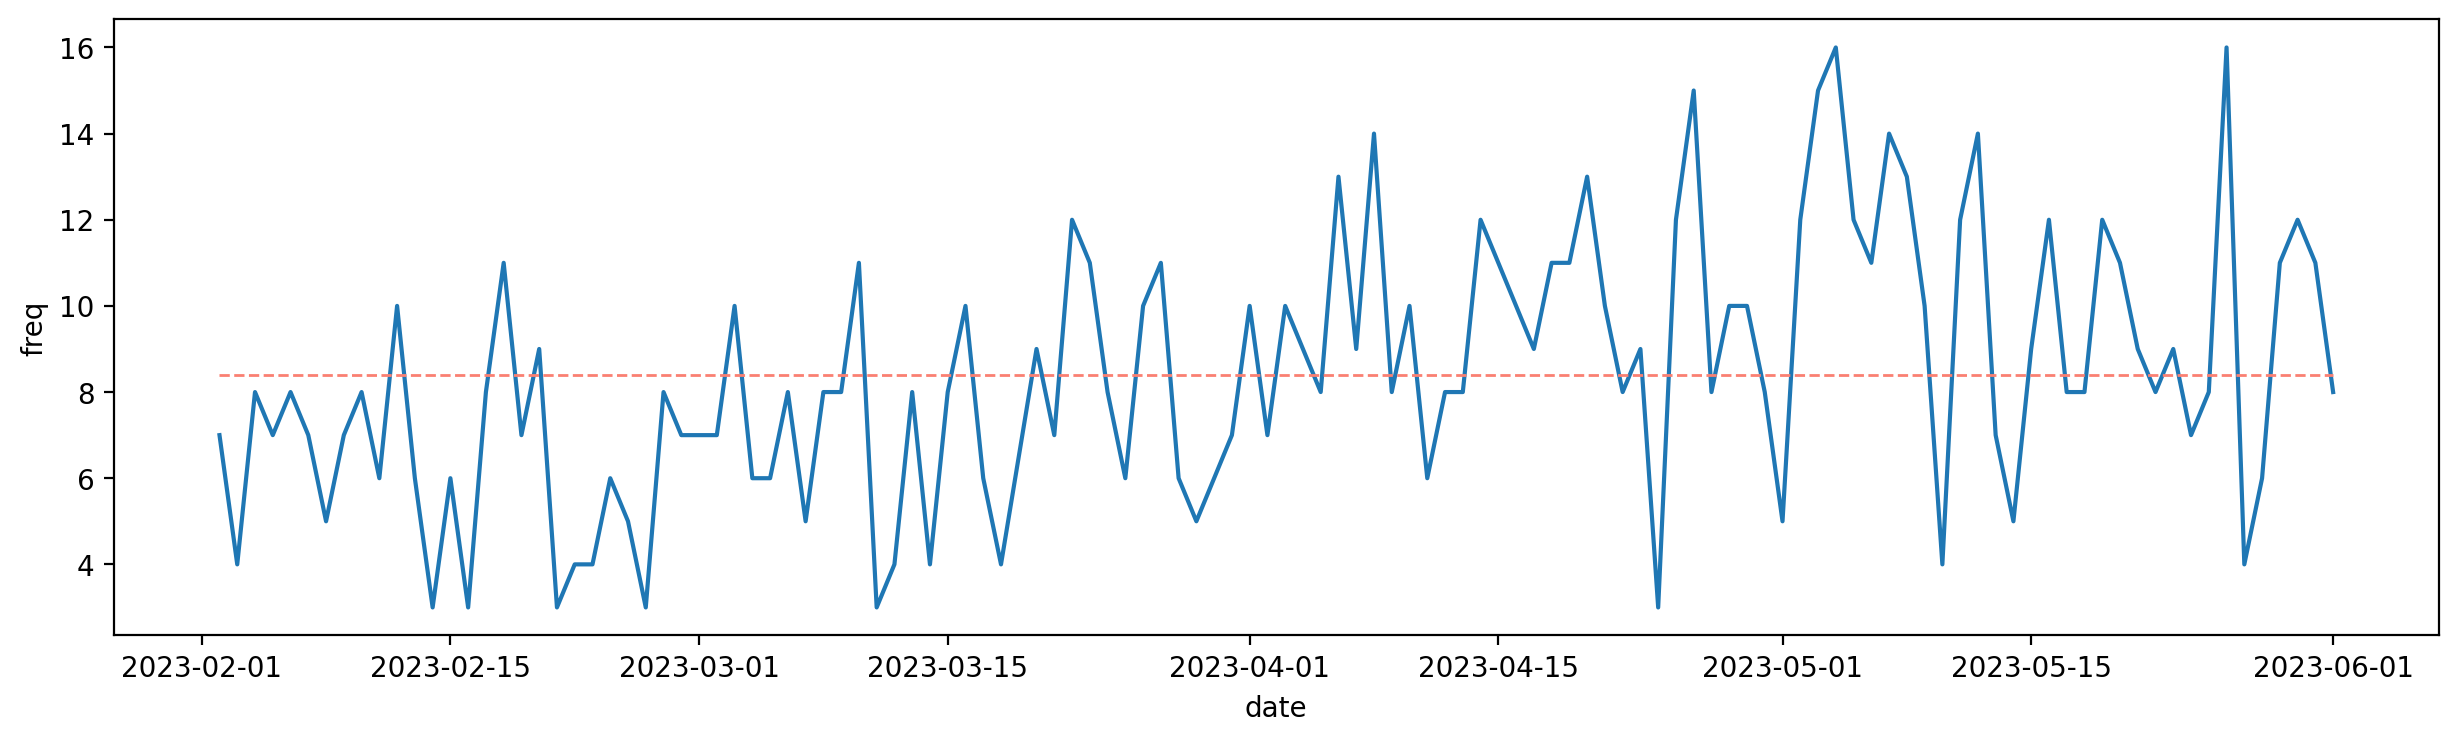

In [40]:
# Check sample distribution
sample_distribution = tweets_samples.groupby("date")["user"].count().reset_index().rename(columns={"user": "freq"})
avg_daily_sample = sample_distribution["freq"].mean()
plt.figure(figsize=(15,4))
sns.lineplot(data=sample_distribution, x="date", y="freq")
plt.hlines(y=avg_daily_sample, xmin=sample_distribution["date"].min(), xmax=sample_distribution["date"].max(), linewidth=1, linestyles="--", color="salmon")
plt.show()

In [41]:
# Load the manually labelled tweet samples, load only index and label to preserve tweet content
labels = pd.read_excel("tweets_samples_processed.xlsx", usecols=["index", "label"])

In [42]:
labels.index = labels["index"]
labels.drop("index", axis=1, inplace=True)

In [43]:
tweet_samples_labeled = pd.merge(left=labels, right=tweets, left_index=True, right_index=True, how="left")

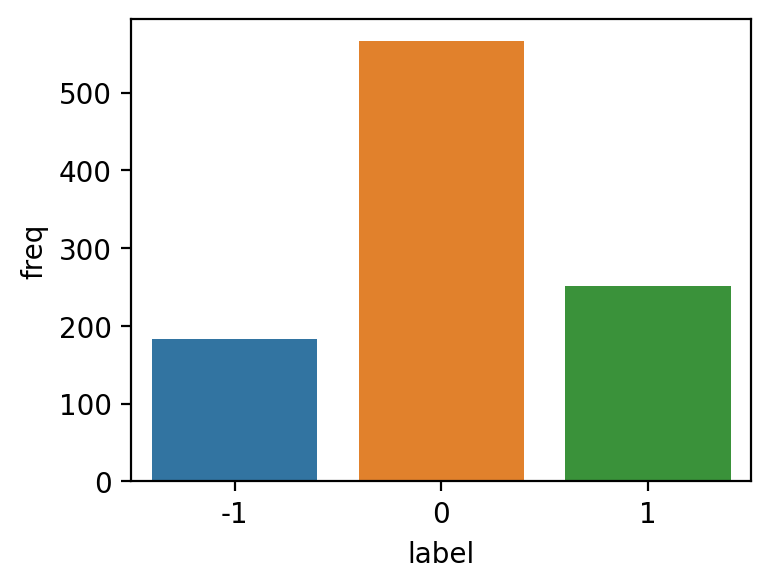

In [44]:
# Plot data to visualize distribution
tweet_samples_agg = tweet_samples_labeled.groupby("label")["user"].count().reset_index().rename(columns={"user": "freq"})
plt.figure(figsize=(4, 3))
sns.barplot(data=tweet_samples_agg, x="label", y="freq")
plt.show()

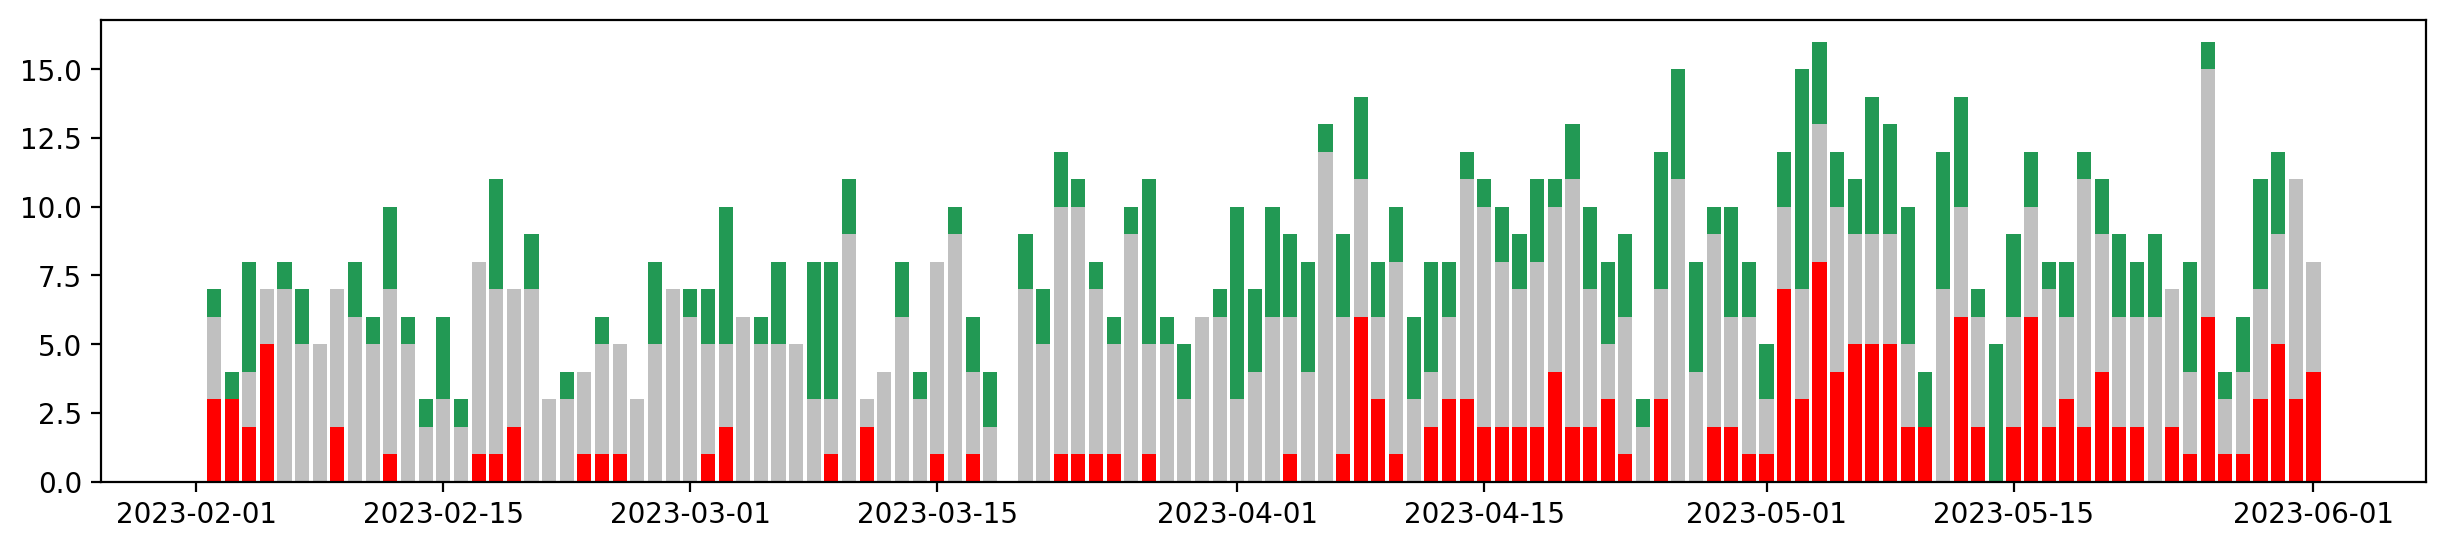

In [45]:
# Visualize sentiment classification of samples over time
labelled = pd.pivot_table(tweet_samples_labeled, index="date", columns="label", values="user", aggfunc="count", fill_value=0).reset_index()
# labelled.columns = ["date", "-1", "0", "1"]
plt.figure(figsize=(15, 3))
plt.bar(x=labelled["date"], height=labelled[-1], color="red")
plt.bar(x=labelled["date"], height=labelled[0], bottom=labelled[-1], color="silver")
plt.bar(x=labelled["date"], height=labelled[1], bottom=labelled[0]+labelled[-1], color="#229954")
plt.show()